In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

%matplotlib inline

pd.set_option('max_columns', 60)

In [2]:
#load dataset
df = pd.read_csv('chiefs_data2019.csv')

#only home games
df = df[df['game_location'] == 'home']

del[
    df['playoff_game'],
    df['game_location']
    
]

#get rid of byes

df = df[df['attendance'] != 'Bye']


df.shape

(120, 25)

In [3]:
df.head()

,season,week,game_day_of_week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance
0,2005,1,Sun,September 11,1:00PM ET,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,"78,014"
3,2005,4,Sun,October 2,4:15PM ET,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,"78,742"
5,2005,6,Sun,October 16,1:00PM ET,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,"78,083"
8,2005,9,Sun,November 6,1:00PM ET,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,"79,033"
11,2005,12,Sun,November 27,1:00PM ET,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,"78,025"


In [4]:
df['attendance'] = df['attendance'].str.replace(',','')

df['attendance'] = df['attendance'].astype('int')

<AxesSubplot:>

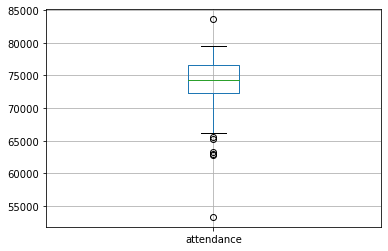

In [5]:
df.boxplot('attendance')

In [23]:
#this game was at Welbly Stadium so we are going to throw it out

df[df['attendance'] >= 80000]

,season,week,game_day_of_week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance
177,2015,8,Sun,November 1,9:36AM ET,W,NaN,3-5,Detroit Lions,45.0,10.0,24.0,340.0,134.0,206.0,NaN,16.0,276.0,195.0,81.0,2.0,21.11,10.04,4.13,83624


In [24]:
df = df[df['attendance'] < 80000].reset_index()

try:
  del[df['index']]
except:
  pass
df.shape

(119, 25)

In [25]:
try:
  del[df['Unnamed: 0']]
except:
  print('unnamed does not exist')
  pass

unnamed does not exist


In [26]:
dummy = pd.get_dummies(df['game_day_of_week'], prefix = 'game_day')

dummy = dummy[['game_day_Sun','game_day_Mon']]

#attach day of week to dataset

df = pd.concat([df,dummy],axis = 1)

del[df['game_day_of_week']]


In [27]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon
0,2005,1,September 11,1:00PM ET,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0
1,2005,4,October 2,4:15PM ET,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0
2,2005,6,October 16,1:00PM ET,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0
3,2005,9,November 6,1:00PM ET,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0
4,2005,12,November 27,1:00PM ET,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0


In [28]:
pd.DataFrame(df.groupby(['game_day_Sun','game_day_Mon'])['attendance'].mean()).reset_index()

,game_day_Sun,game_day_Mon,attendance
0,0,0,75420.000000
1,0,1,74360.600000
2,1,0,73421.691589


In [29]:
df.game_time.value_counts()

1:00PM ET     53
1:03PM ET     24
1:02PM ET     10
4:26PM ET      4
8:20PM ET      4
1:04PM ET      3
4:25PM ET      3
8:30PM ET      3
4:15PM ET      2
8:31PM ET      2
8:25PM ET      2
8:32PM ET      1
8:12PM ET      1
1:05PM ET      1
4:06PM ET      1
1:08PM ET      1
1:06PM ET      1
8:40PM ET      1
8:29PM ET      1
10:20PM ET     1
Name: game_time, dtype: int64

In [30]:
#consolidate the times 

aa = [] 

for x in df['game_time']:
  aa.append(re.match(r'^[0-9]+', x)[0])

df['game_time'] = aa

In [31]:
df.game_time.value_counts()

1     93
8     15
4     10
10     1
Name: game_time, dtype: int64

In [32]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0


In [33]:
#split up wins and losses

wins = []
loss = []

for x in df['team_record']:
  w = x[0]
  l = x[-1]
  wins.append(int(w))
  loss.append(int(l))
  
df['wins'] = wins
df['losses'] = loss


In [34]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4


<AxesSubplot:>

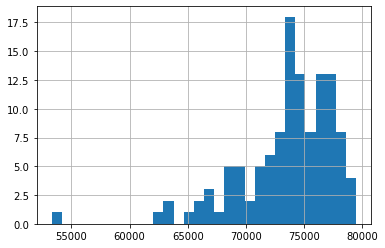

In [35]:
df['attendance'].hist(bins = 30)

In [36]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4


In [37]:
#hotcode Overtime
aa = []

for x in df.overtime:
  if x == 'OT':
    aa.append(1)
  else:
    aa.append(0)
df['overtime'] = aa

In [38]:
#win / loss ratio

df['win_ratio'] = df['wins'] / (df['wins'] + df['losses'])

In [39]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,September 11,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,October 2,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,October 16,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,November 6,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,November 27,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


<AxesSubplot:xlabel='win_ratio', ylabel='attendance'>

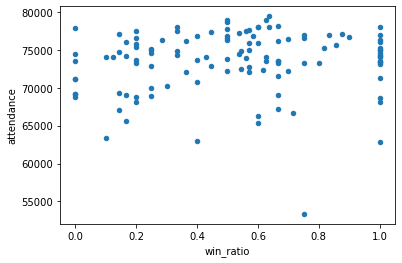

In [40]:
df.plot('win_ratio','attendance', kind = 'scatter')

In [41]:
df[['win_ratio','attendance']].corr()

,win_ratio,attendance
win_ratio,1.000000,0.105956
attendance,0.105956,1.000000


In [42]:
df.corr()

,season,week,overtime,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
season,1.000000,0.026605,-0.029439,0.172195,-0.163228,0.095963,0.067548,0.238825,-0.194626,-0.223513,0.239733,0.076235,0.029792,0.061024,0.093684,0.239972,-0.077470,0.151723,-0.082615,-0.085740,0.088283,0.131226,-0.201890,0.201729
week,0.026605,1.000000,-0.022538,0.013740,-0.080155,0.048483,0.154487,0.045109,0.178592,-0.092133,-0.075795,-0.108491,-0.118262,0.011173,-0.063904,0.075426,0.056412,-0.073134,-0.154807,-0.011714,-0.188374,0.348744,0.559834,-0.117193
overtime,-0.029439,-0.022538,1.000000,0.012313,0.050819,0.156689,0.116121,0.154875,-0.016329,-0.089426,0.148836,0.203442,0.200287,0.006799,0.073884,0.039679,-0.013985,-0.085908,-0.126322,-0.132984,0.111041,-0.098412,0.124023,-0.081783
pts_off,0.172195,0.013740,0.012313,1.000000,-0.065096,0.558052,0.588854,0.535444,0.228287,-0.234521,0.123198,0.006889,0.229376,-0.287363,0.350757,0.753249,0.126080,-0.030414,0.170887,-0.084032,0.135151,0.162976,-0.238645,0.314304
pts_def,-0.163228,-0.080155,0.050819,-0.065096,1.000000,-0.029515,-0.077080,0.025491,-0.148851,0.420598,0.497389,0.571664,0.293186,0.367446,-0.167787,-0.206808,-0.729458,-0.005884,-0.118049,0.102205,-0.059042,-0.196556,0.007588,-0.133861
first_down_off,0.095963,0.048483,0.156689,0.558052,-0.029515,1.000000,0.770768,0.618684,0.401093,-0.059421,-0.092113,-0.183548,0.060145,-0.317310,-0.009914,0.688777,-0.041965,-0.376288,0.063465,-0.039845,0.004310,0.147827,-0.152578,0.210644
yards_off,0.067548,0.154487,0.116121,0.588854,-0.077080,0.770768,1.000000,0.755591,0.578999,-0.104853,-0.140862,-0.203497,0.051590,-0.332297,0.079182,0.696589,0.078669,-0.456151,-0.094075,-0.023944,-0.012121,0.093726,-0.127350,0.201472
pass_yds_off,0.238825,0.045109,0.154875,0.535444,0.025491,0.618684,0.755591,1.000000,-0.096590,-0.130242,0.060506,-0.016453,0.086424,-0.133138,0.137300,0.581868,-0.044912,-0.247762,0.060743,0.007676,-0.040036,0.103898,-0.163990,0.222610
rush_yds_off,-0.194626,0.178592,-0.016329,0.228287,-0.148851,0.401093,0.578999,-0.096590,1.000000,0.000970,-0.289348,-0.288730,-0.029182,-0.339202,-0.050594,0.334204,0.175438,-0.384723,-0.218551,-0.045936,0.031415,0.013094,0.010612,0.029051
to_off,-0.223513,-0.092133,-0.089426,-0.234521,0.420598,-0.059421,-0.104853,-0.130242,0.000970,1.000000,-0.006917,0.061540,0.015730,0.060882,-0.155379,-0.480387,-0.107847,0.029119,-0.014850,-0.176143,0.120547,-0.134603,-0.032821,-0.087121


In [43]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,September 11,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,October 2,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,October 16,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,November 6,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,November 27,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


In [44]:
del[df['game_date']]

In [45]:
df.head()

,season,week,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


In [46]:
#use only last word for opponent
#this will account for the St. Louis Rams
#movign to Los Angeles

aa = []

for x in df['opp']:
  word_splitter = x.split()
  aa.append(word_splitter[-1])
  
df['opp'] = aa

In [47]:
df.head()

,season,week,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,W,0,1-0,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,4,L,0,2-2,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,1,W,0,3-2,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,W,0,5-3,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,1,W,0,7-4,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


In [48]:
del[
    df['game_outcome'],
    df['overtime'],
    df['team_record']
]

In [49]:
df.head()

,season,week,game_time,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,4,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,1,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,1,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


In [50]:
df['game_time'].unique()

dummy = pd.get_dummies(df['game_time'], prefix = 'gametime')

df = pd.concat([df,dummy], axis = 1)

df.head()

,season,week,game_time,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8
0,2005,1,1,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000,1,0,0,0
1,2005,4,4,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000,0,0,1,0
2,2005,6,1,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0
3,2005,9,1,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000,1,0,0,0
4,2005,12,1,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0


In [51]:
#dummy opponents. Might need to do feature reduction later:

dummy = pd.get_dummies(df['opp'],prefix = 'opp')

df = pd.concat([df, dummy], axis = 1)

del[df['opp']]

In [52]:
df.head()

,season,week,game_time,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,2005,1,1,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,4,4,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,6,1,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2005,9,1,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2005,12,1,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [53]:
df.shape

(119, 58)

<AxesSubplot:>

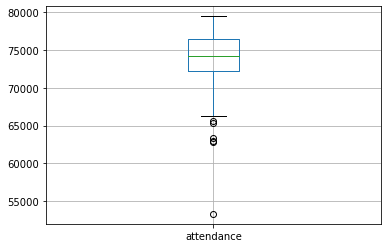

In [54]:
df.boxplot('attendance')

In [ ]:
df.head()

,season,week,game_time,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,2005,1,1,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,4,4,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,6,1,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2005,9,1,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2005,12,1,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [55]:
df.to_csv('chiefs_data_clean2019.csv',index = False)